<a href="https://colab.research.google.com/github/JoshRogers18/Heart-failure-prediction/blob/main/Heart_Failure_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(dplyr)
library(ggplot2)
library(lattice)
install.packages('caret')
library(caret)
install.packages('ROCR')
library(ROCR)
install.packages('corrplot')
library(corrplot)

install.packages('PerformanceAnalytics')
library(PerformanceAnalytics)
install.packages('ggthemes')
library(ggthemes)
install.packages('car')
library(car)
# install.packages('psych')
# library(psych)
install.packages('caretEnsemble')
library(caretEnsemble)
install.packages('doParallel')
library(doParallel)

install.packages("DataExplorer")
library(DataExplorer)
install.packages("tidyverse")
library(tidyverse)
install.packages("gridExtra")
library(gridExtra)
install.packages("ResourceSelection")
library(ResourceSelection)
install.packages("pscl")
library(pscl)
install.packages("pROC")
library(pROC)


In [4]:
%%R
data <- read.csv("Heart_Failure.csv")
head(data)

  age anaemia creatinine_phosphokinase diabetes ejection_fraction
1  75       0                      582        0                20
2  55       0                     7861        0                38
3  65       0                      146        0                20
4  50       1                      111        0                20
5  65       1                      160        1                20
6  90       1                       47        0                40
  high_blood_pressure platelets serum_creatinine serum_sodium sex smoking time
1                   1    265000              1.9          130   1       0    4
2                   0    263358              1.1          136   1       0    6
3                   0    162000              1.3          129   1       1    7
4                   0    210000              1.9          137   1       0    7
5                   0    327000              2.7          116   0       0    8
6                   1    204000              2.1          132   

In [5]:
%%R

sapply(data, function(x) sum(is.na(x)))

dt = sort(sample(nrow(data), nrow(data)*.7))
train <- data[dt,]
test <- data[-dt,]

In [6]:
%%R

train_model <- glm(DEATH_EVENT ~ ., data = train, family = "binomial")
summary(train_model)

results <- train %>% 
  mutate(pred_prob_model = predict(train_model, newdata = train, type = "response")) %>% 
  mutate(pred_outcome_model = ifelse(pred_prob_model >= 0.5, 1,0))

results$DEATH_EVENT <- as.factor(results$DEATH_EVENT)
results$pred_outcome_model <- as.factor(results$pred_outcome_model)

confusionMatrix(results$pred_outcome_model, results$DEATH_EVENT)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 122  18
         1  14  55
                                          
               Accuracy : 0.8469          
                 95% CI : (0.7908, 0.8929)
    No Information Rate : 0.6507          
    P-Value [Acc > NIR] : 1.833e-10       
                                          
                  Kappa : 0.6588          
                                          
 Mcnemar's Test P-Value : 0.5959          
                                          
            Sensitivity : 0.8971          
            Specificity : 0.7534          
         Pos Pred Value : 0.8714          
         Neg Pred Value : 0.7971          
             Prevalence : 0.6507          
         Detection Rate : 0.5837          
   Detection Prevalence : 0.6699          
      Balanced Accuracy : 0.8252          
                                          
       'Positive' Class : 0               
                              

[[1]]
[1] 0.8650227



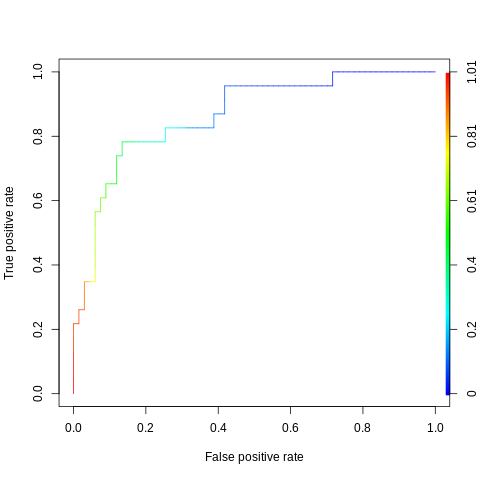

In [7]:
%%R

final_results <- test %>% 
  mutate(pred_prob_model = predict(train_model, newdata = test, type = "response")) %>% 
  mutate(pred_outcome_model = ifelse(pred_prob_model >= 0.5, 1,0)) 

#Let's turn the "DEATH_EVENT" and the "pred_outcome_model" to factors 
final_results$DEATH_EVENT <- as.factor(final_results$DEATH_EVENT)
final_results$pred_outcome_model <- as.factor(final_results$pred_outcome_model)

#Let's see how our model did with the test data set
confusionMatrix(final_results$pred_outcome_model, final_results$DEATH_EVENT)

pred <- prediction(final_results$pred_prob_model, final_results$DEATH_EVENT) 
class(pred)

perf <- performance(pred, "tpr", "fpr")
plot(perf, colorize=T)

auc.perf <-  performance(pred, measure = "auc")
auc.perf@y.values

In [8]:
%%R

heart <- read.csv("Heart_Failure.csv")
head(heart)

heart$anaemia=factor(heart$anaemia)
heart$diabetes=factor(heart$diabetes)
heart$high_blood_pressure=factor(heart$high_blood_pressure)
heart$sex=factor(heart$sex)
heart$smoking=factor(heart$smoking)
heart$DEATH_EVENT=factor(heart$DEATH_EVENT)

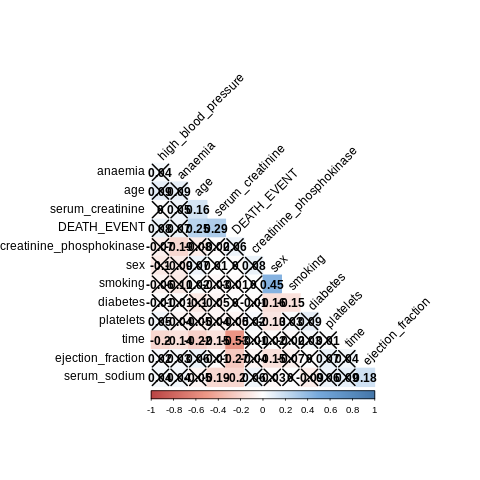

In [26]:
%%R

cor.mtest <- function(mat, ...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
# matrix of the p-value of the correlation
p.mat <- cor.mtest(data)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot(cor(data), method = "color",col=col(200), type = "lower", order = "hclust",addCoef.col = "black",
tl.col="black", tl.srt=45, p.mat = p.mat, sig.level= 0.05, diag=FALSE)

In [10]:
%%R

set.seed(1234)
a=sample(1:299,239)
train=heart[a,]
test=heart[-a,]

#MLR
lr.model=glm(DEATH_EVENT~.,family=binomial,data=train)
lr.model0=glm(DEATH_EVENT~1,family=binomial,data=train)
anova(lr.model,lr.model0, test='Chisq')
summary(lr.model)


Call:
glm(formula = DEATH_EVENT ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3873  -0.5558  -0.2288   0.4220   2.6183  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.604e+01  6.929e+00   2.315 0.020614 *  
age                       4.267e-02  1.858e-02   2.296 0.021685 *  
anaemia1                 -8.625e-02  4.059e-01  -0.212 0.831739    
creatinine_phosphokinase  4.401e-04  3.039e-04   1.448 0.147565    
diabetes1                 1.494e-01  3.894e-01   0.384 0.701179    
ejection_fraction        -7.910e-02  1.833e-02  -4.315 1.60e-05 ***
high_blood_pressure1     -9.075e-02  3.976e-01  -0.228 0.819442    
platelets                -1.034e-06  2.510e-06  -0.412 0.680329    
serum_creatinine          7.122e-01  1.965e-01   3.625 0.000289 ***
serum_sodium             -1.108e-01  4.970e-02  -2.230 0.025748 *  
sex1                     -3.200e-01  4.747e-01  -0.6

In [28]:
%%R

#Stepwise model
# install.packages('randomForest')
library(randomForest)

lr.model.st=step(lr.model)
summary(lr.model.st)

Start:  AIC=202.89
DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes + 
    ejection_fraction + high_blood_pressure + platelets + serum_creatinine + 
    serum_sodium + sex + smoking + time

                           Df Deviance    AIC
- anaemia                   1   176.94 200.94
- high_blood_pressure       1   176.94 200.94
- smoking                   1   176.96 200.96
- diabetes                  1   177.04 201.04
- platelets                 1   177.06 201.06
- sex                       1   177.35 201.35
<none>                          176.89 202.89
- creatinine_phosphokinase  1   179.67 203.67
- serum_sodium              1   182.17 206.17
- age                       1   182.58 206.58
- serum_creatinine          1   190.99 214.99
- ejection_fraction         1   200.18 224.18
- time                      1   228.34 252.34

Step:  AIC=200.94
DEATH_EVENT ~ age + creatinine_phosphokinase + diabetes + ejection_fraction + 
    high_blood_pressure + platelets + serum_creatin

R[write to console]: `geom_smooth()` using formula 'y ~ x'



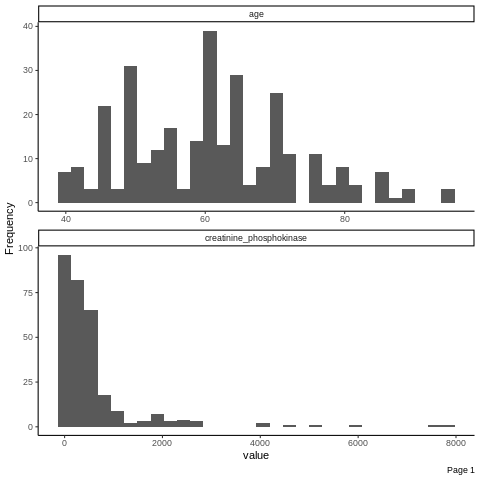

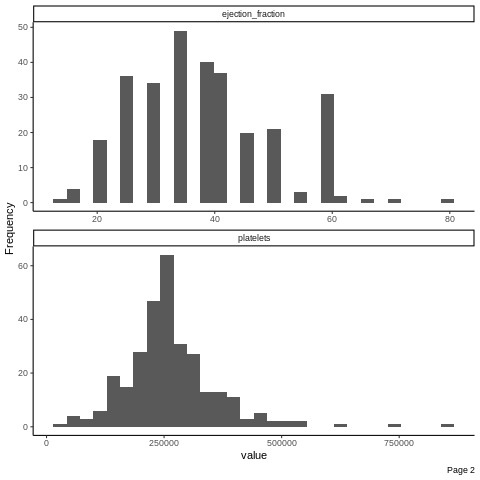

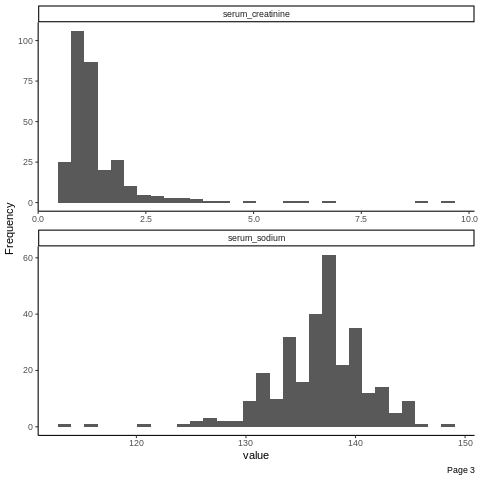

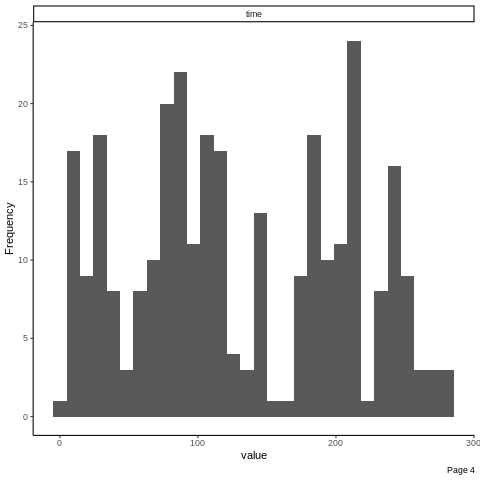

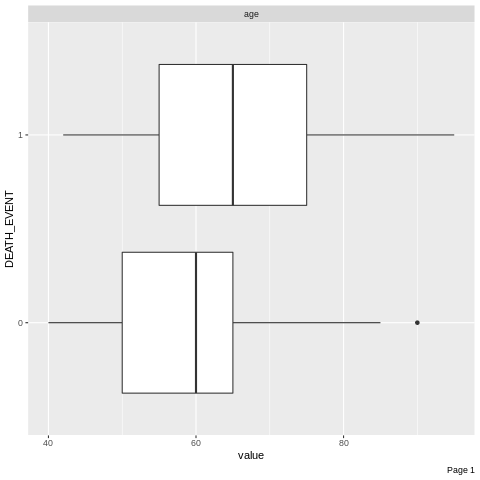

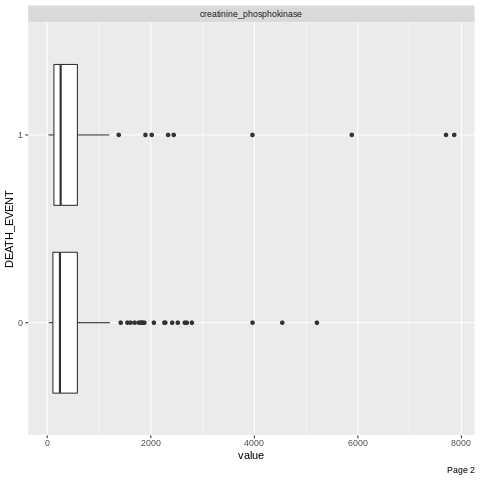

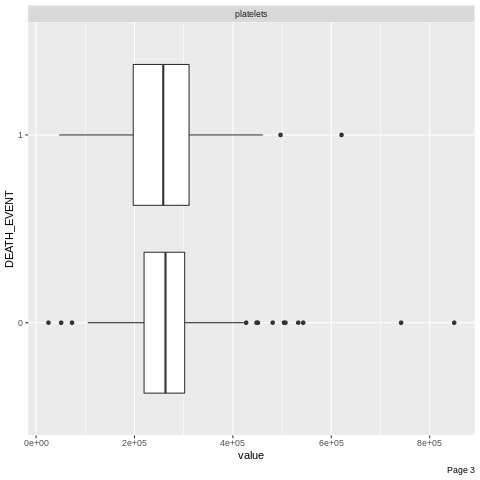

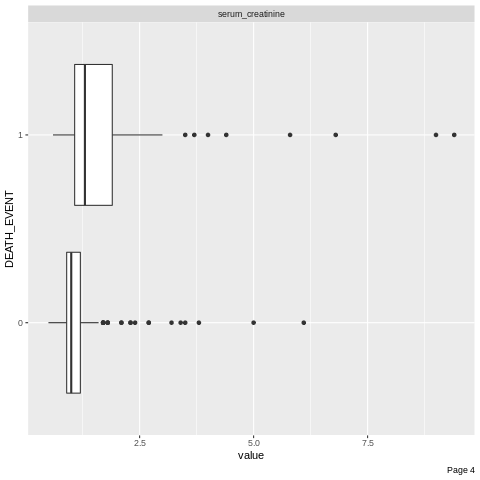

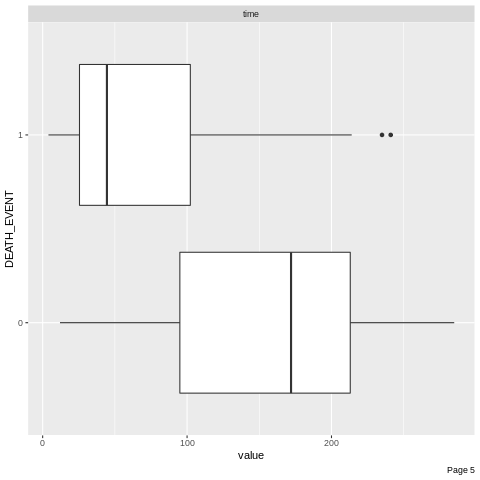

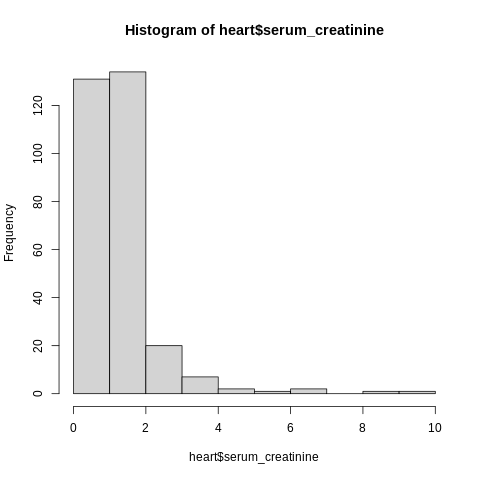

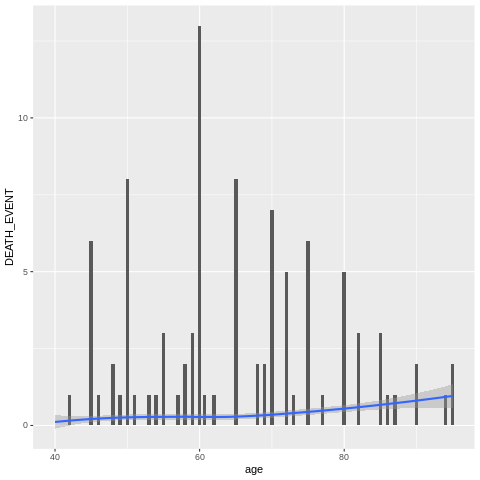

In [13]:
%%R

#NEED TO LOOK AT SERUM, PALATELS,CREATININE, AGE, EJECTION, SODIUM? FOR OUTLIERS
plot_histogram(heart, ncol = .5L, ggtheme = theme_classic())
plot_boxplot(heart, by = "DEATH_EVENT", ncol = .5L)

hist(heart$serum_creatinine)

ggplot(data, aes(x=age, y=DEATH_EVENT)) + geom_bar(stat = "identity", width=0.5) + stat_smooth(method=loess)

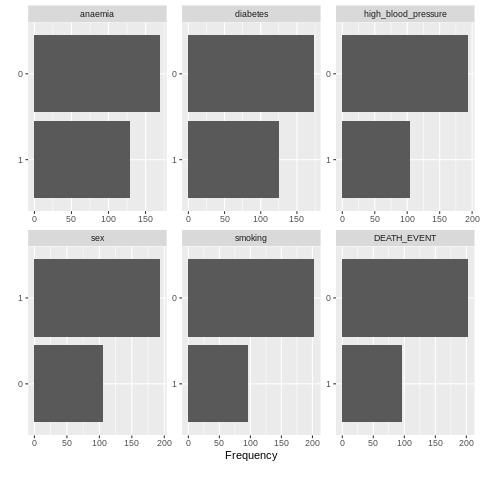

In [ ]:
%%R

plot_bar(heart)

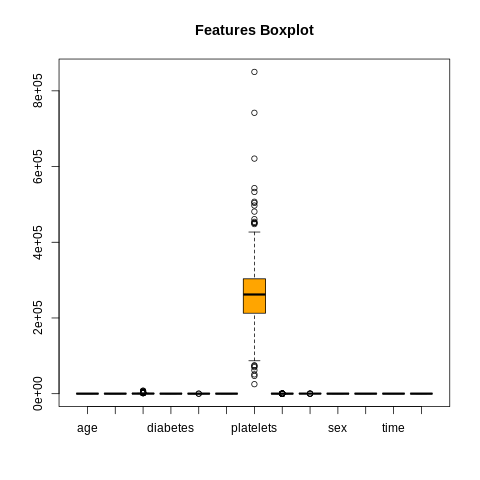

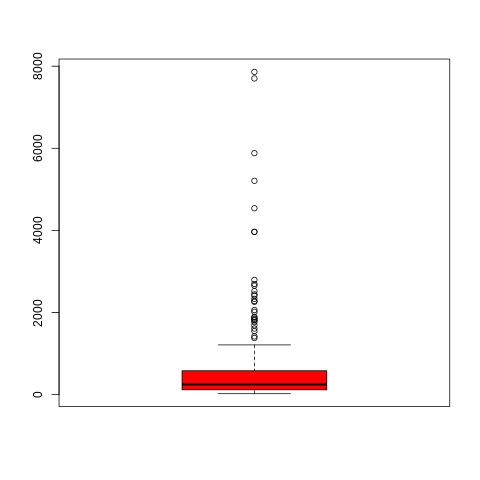

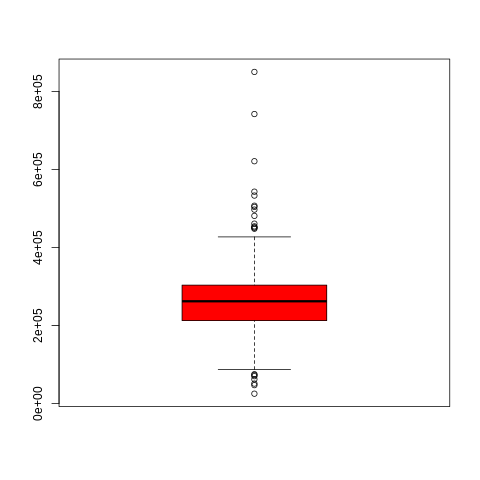

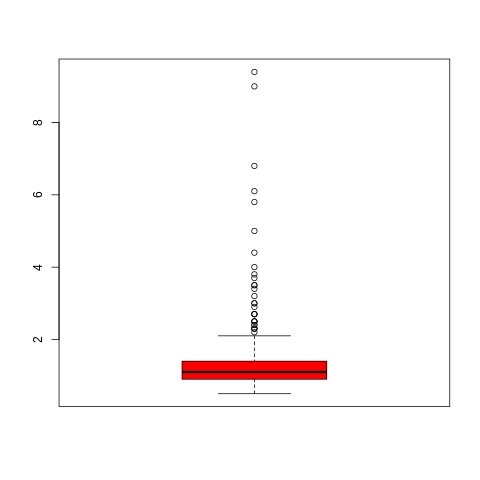

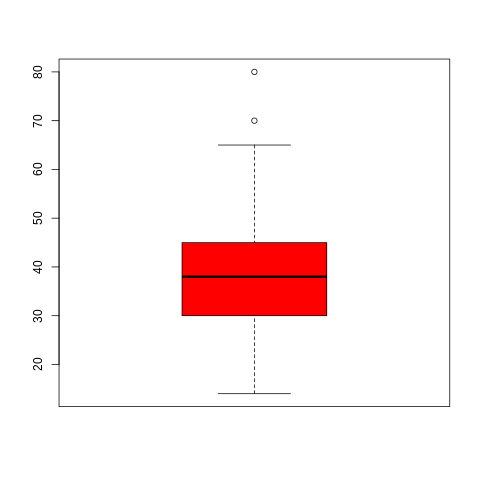

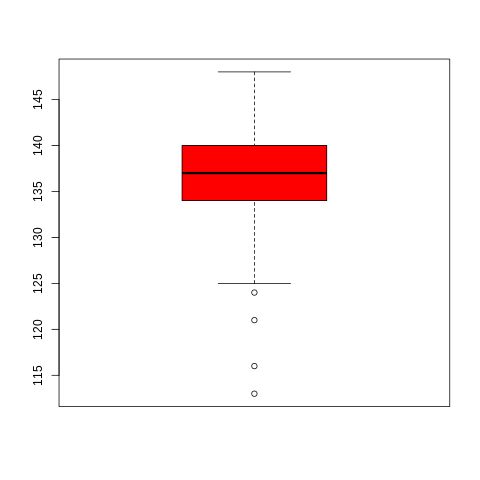

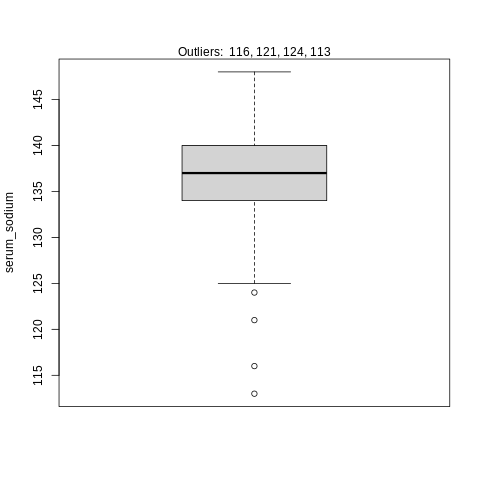

In [14]:
%%R

boxplot(heart, col = "orange", main = "Features Boxplot")
boxplot(heart$creatinine_phosphokinase, col = "red")
age_outliers <- which(heart$creatinine_phosphokinase > 1000)
heart[age_outliers, "creatinine_phosphokinase"]
boxplot.stats(heart$creatinine_phosphokinase)$out

boxplot(heart$platelets, col = "red")
boxplot.stats(heart$platelets)$out

boxplot(heart$serum_creatinine, col = "red")
serum_outliers <- which(heart$serum_creatinine > 2.1)
heart[serum_outliers, "serum_creatinine"]
boxplot.stats(heart$serum_creatinine)$out

boxplot(heart$ejection_fraction, col = "red")
serum2_outliers <- which(heart$ejection_fraction > 65)
heart[serum2_outliers, "ejection_fraction"]
boxplot.stats(heart$ejection_fraction)$out

boxplot(heart$serum_sodium, col = "red")
serum3_outliers <- which(heart$serum_sodium < 125)
heart[serum2_outliers, "serum_sodium"]

out<-boxplot.stats(heart$serum_sodium)$out
boxplot(heart$serum_sodium,
  ylab = "serum_sodium")
mtext(paste("Outliers: ", paste(out, collapse = ", ")))

In [15]:
%%R

#no multicollinearity
simple_lm <- lm(DEATH_EVENT ~ ., data = data)
vif(simple_lm)

                     age                  anaemia creatinine_phosphokinase 
                1.106067                 1.087163                 1.066014 
                diabetes        ejection_fraction      high_blood_pressure 
                1.064324                 1.067758                 1.068377 
               platelets         serum_creatinine             serum_sodium 
                1.045809                 1.081241                 1.101927 
                     sex                  smoking                     time 
                1.337716                 1.285049                 1.138009 


In [18]:
%%R

#Rosner’s test
#it is used to detect several outliers at once (unlike Grubbs and Dixon test which must be performed iteratively to screen for multiple outliers), and
#it is designed to avoid the problem of masking, where an outlier that is close in value to another outlier can go undetected.
install.packages('EnvStats')
library(EnvStats)
test1 <- rosnerTest(heart$creatinine_phosphokinase, k = 36)
test1
test1$all.stats

    i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1   0 581.8395 970.2879  7861       2 7.502063   3.722611    TRUE
2   1 557.4128 875.0001  7702      61 8.165242   3.721664    TRUE
3   2 533.3569 771.4800  5882      73 6.932964   3.720713    TRUE
4   3 515.2872 707.0326  5209     104 6.638609   3.719759    TRUE
5   4 499.3763 652.9979  4540     135 6.187806   3.718801    TRUE
6   5 485.6327 609.8768  3966     172 5.706673   3.717839    TRUE
7   6 473.7543 575.8465  3964      53 6.061070   3.716874    TRUE
8   7 461.8014 539.1970  2794     228 4.325318   3.715904    TRUE
9   8 453.7869 522.4134  2695     281 4.290114   3.714931    TRUE
10  9 446.0586 506.3788  2656      39 4.364206   3.713954    TRUE
11 10 438.4118 490.1972  2522     251 4.250510   3.712974    TRUE
12 11 431.1771 475.3435  2442     165 4.230252   3.711989    TRUE
13 12 424.1707 461.0363  2413     298 4.313824   3.711001    TRUE
14 13 417.2168 446.5120  2334     164 4.292792   3.710008    TRUE
15 14 410.

In [19]:
%%R

test2 <- rosnerTest(heart$platelets, k = 21)
test2
test2$all.stats

    i   Mean.i     SD.i  Value Obs.Num    R.i+1 lambda.i+1 Outlier
1   0 263358.0 97804.24 850000     110 5.998124   3.722611    TRUE
2   1 261389.4 91843.55 742000     297 5.232927   3.721664    TRUE
3   2 259771.2 87639.88 621000     106 4.121740   3.720713    TRUE
4   3 258550.8 85223.02 543000     288 3.337703   3.719759   FALSE
5   4 257586.6 83734.86 533000     241 3.289113   3.718801   FALSE
6   5 256649.8 82314.60 507000     118 3.041382   3.717839   FALSE
7   6 255795.4 81138.92 504000     225 3.059008   3.716874   FALSE
8   7 254945.4 79960.74 497000      70 3.027168   3.715904   FALSE
9   8 254113.6 78822.82  25100     278 2.905422   3.714931   FALSE
10  9 254903.3 77797.37 481000     213 2.906226   3.713954   FALSE
11 10 254120.9 76781.08  47000      16 2.697552   3.712974   FALSE
12 11 254840.1 75933.40 461000      56 2.715009   3.711989   FALSE
13 12 254121.8 75079.40  51000     282 2.705426   3.711001   FALSE
14 13 254832.0 74238.95 454000       8 2.682796   3.710008   F

In [20]:
%%R

test3 <- rosnerTest(heart$serum_creatinine, k = 29)
test3
test3$all.stats

    i   Mean.i      SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1   0 1.393880 1.0345101   9.4      10 7.739045   3.722611    TRUE
2   1 1.367013 0.9258899   9.0     218 8.243946   3.721664    TRUE
3   2 1.341313 0.8140473   6.8      53 6.705614   3.720713    TRUE
4   3 1.322872 0.7507132   6.1     132 6.363453   3.719759    TRUE
5   4 1.306678 0.6982849   5.8      29 6.434797   3.718801    TRUE
6   5 1.291395 0.6481697   5.0     229 5.721658   3.717839    TRUE
7   6 1.278737 0.6118007   4.4      49 5.101764   3.716874    TRUE
8   7 1.268048 0.5848017   4.0      11 4.671587   3.715904    TRUE
9   8 1.258660 0.5633361   3.8     283 4.511233   3.714931    TRUE
10  9 1.249897 0.5440782   3.7     125 4.503219   3.713954    TRUE
11 10 1.241419 0.5254836   3.5      36 4.298100   3.712974    TRUE
12 11 1.233576 0.5091751   3.5     204 4.451167   3.711989    TRUE
13 12 1.225679 0.4920801   3.4     130 4.418632   3.711001    TRUE
14 13 1.218077 0.4757585   3.2     118 4.165818   3.710008    

In [21]:
%%R

test4 <- rosnerTest(heart$ejection_fraction, k = 2)
test4
test4$all.stats

  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 38.08361 11.83484    80      65 3.541779   3.722611   FALSE
2 1 37.94295 11.60170    70     218 2.763134   3.721664   FALSE


In [22]:
%%R

test5 <- rosnerTest(heart$serum_sodium, k = 4)
test5
test5$all.stats

  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 136.6254 4.412477   113     200 5.354230   3.722611    TRUE
2 1 136.7047 4.201176   116       5 4.928310   3.721664    TRUE
3 2 136.7744 4.031919   121      20 3.912383   3.720713    TRUE
4 3 136.8277 3.932573   124     127 3.261911   3.719759   FALSE


In [30]:
%%R

# install.packages('nortest')
library(nortest)

ad.test(heart$age)
ad.test(heart$time)
ad.test(heart$ejection_fraction)
ad.test(heart$serum_creatinine)


	Anderson-Darling normality test

data:  heart$serum_creatinine
A = 36.451, p-value < 2.2e-16

